<a href="https://colab.research.google.com/github/YassinDhaya/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales

- Author: Yassine Dhaya

## Project Overview

## Load and Inspect Data

In [3]:
# Import required packages
import pandas as pd
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Save the filepath and load the data as "df"
path = '/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv'
df = pd.read_csv(path)

In [5]:
# Display the info for the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
# Display the first 5 rows
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Clean Data

#### How many rows/columns:

In [7]:
df.shape

(8523, 12)



*   there are `8523` rows and `12` columns


#### Checking the data types:

In [8]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

#### ckecking duplicates

In [9]:
# Save a filter called "duplicated_rows" that identifies duplicated rows
duplicated_rows = df.duplicated()

# Get the sum of duplicated_rows filter to see the number of duplicate rows
duplicated_rows.sum()

0



*   There is no duplicates



#### Missing values


In [10]:
# Get the number of null values for all columns and save as a variable
null_sum = df.isna().sum()
null_sum

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
# Use this result to calculate the percentage of null values for each column.
null_percent =(df.isna().sum() / len(df) * 100).round(2)
null_percent

Item_Identifier               0.00
Item_Weight                  17.17
Item_Fat_Content              0.00
Item_Visibility               0.00
Item_Type                     0.00
Item_MRP                      0.00
Outlet_Identifier             0.00
Outlet_Establishment_Year     0.00
Outlet_Size                  28.28
Outlet_Location_Type          0.00
Outlet_Type                   0.00
Item_Outlet_Sales             0.00
dtype: float64

<Axes: >

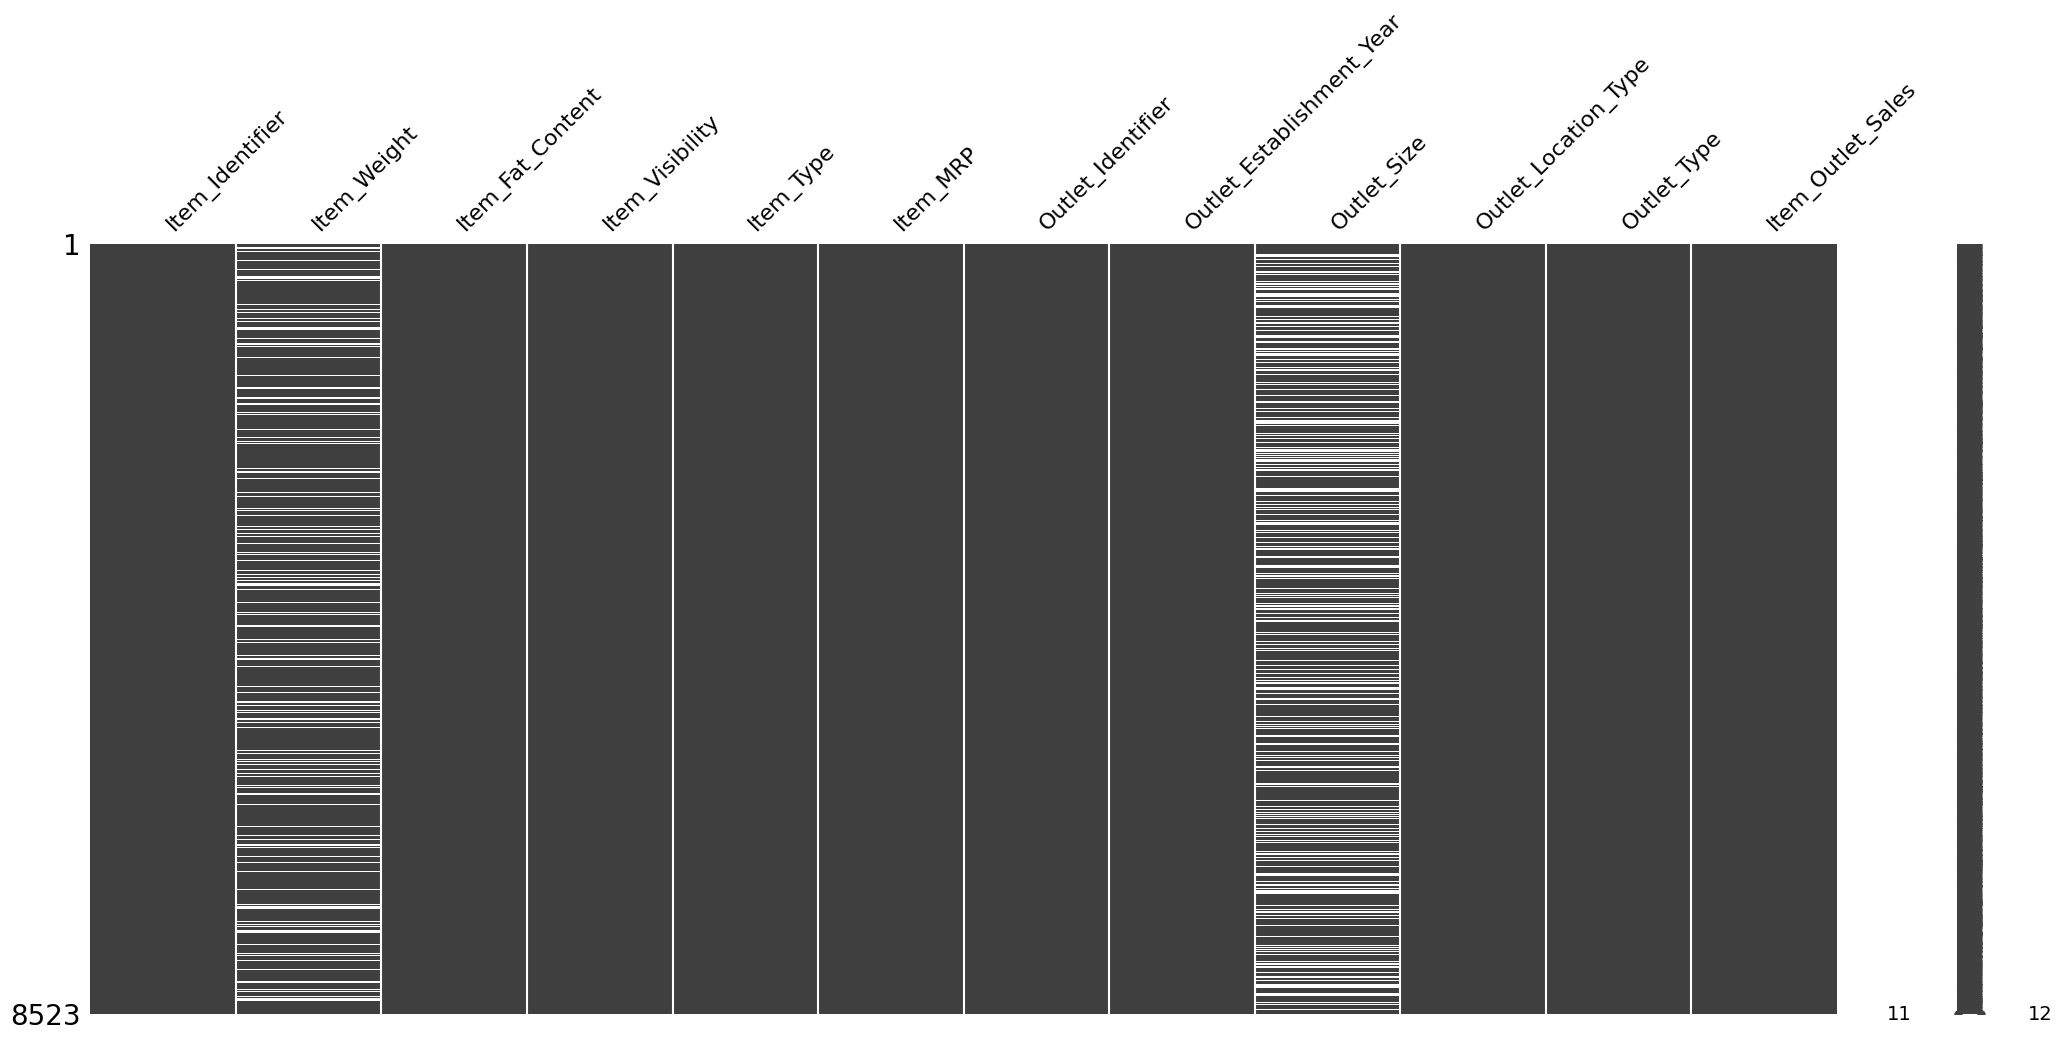

In [12]:
# Visualize the missing values using the missingno package's matrix plot.
import missingno as msno
msno.matrix(df)

##### Address the null values:

- Fill the null values in categorical column with a placeholder category called MISSING.

In [13]:
# save list of categorical column name. (Hint: select_dtypes)
cat_cols = df.select_dtypes('object').columns
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [14]:
# use the list of cat columns to fill null values with MISSING
df[cat_cols] = df[cat_cols].fillna('MISSING')

---


- Fill the null values in numeric column with a placeholder value of -1

In [15]:
# save list of numeric column names (Hint: select_dtypes)
num_cols = df.select_dtypes('number').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [16]:
# use the list of num columns to fill null values with -1
df[num_cols] = df[num_cols].fillna(-1)

- Use Pandas to confirm that there are 0 null values remaining.


In [17]:
# Confirm no more nulls using Pandas
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

#### Consistent Values

- Check each string column's value counts for inconsistent values.

In [18]:
# Save a list of object columns
obj_cols = df.select_dtypes('object').columns
obj_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [19]:
# Check the nunique for just the object cols
df[obj_cols].nunique()

Item_Identifier         1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                4
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

##### For Each Remaining Categorical Column:

- Display the value counts for the column
- Take a note of any values that are not consistent.
- Remove/fix the inconsistent values
- Confirm by checking the value counts again

In [20]:
# loop through the list of string columns
for i in obj_cols:
  v = df[i].value_counts()
  # print the value counts for the column
  print(f'The value count of {i} is\n{v}')
  # Print an empty line for readability
  print('\n')

The value count of Item_Identifier is
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


The value count of Item_Fat_Content is
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


The value count of Item_Type is
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


The value count of Outlet_Identifier is
OUT027    935
OUT013    932
OUT049  

- All data are consistent

#### Statistics on numerical columns

In [21]:
# Save a list of object columns
numu_cols = df.select_dtypes('object').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [22]:
import numpy as np
for num in num_cols:
  print(f'Statistics of {num}:\nMin is equal to {df[num].min().round(3)}\nMax is equal to {df[num].max().round(3)}\nMean is equal to {np.mean(df[num]).round(3)} ')
  print('\n')

Statistics of Item_Weight:
Min is equal to -1.0
Max is equal to 21.35
Mean is equal to 10.479 


Statistics of Item_Visibility:
Min is equal to 0.0
Max is equal to 0.328
Mean is equal to 0.066 


Statistics of Item_MRP:
Min is equal to 31.29
Max is equal to 266.888
Mean is equal to 140.993 


Statistics of Outlet_Establishment_Year:
Min is equal to 1985
Max is equal to 2009
Mean is equal to 1997.832 


Statistics of Item_Outlet_Sales:
Min is equal to 33.29
Max is equal to 13086.965
Mean is equal to 2181.289 




- **Warning: the placeholder values we put instead of missing values affected the statistical findings**

## Exploratory Data Analysis

### Univariate Exploratory Data Analysis

#### EDA for categorical features

<ipython-input-36-c76e4c3b27a6>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  p3.set_xticklabels(p3.get_xticklabels(), rotation=45);
<ipython-input-36-c76e4c3b27a6>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  p3.set_xticklabels(p3.get_xticklabels(), rotation=45);
<ipython-input-36-c76e4c3b27a6>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  p3.set_xticklabels(p3.get_xticklabels(), rotation=45);
<ipython-input-36-c76e4c3b27a6>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  p3.set_xticklabels(p3.get_xticklabels(), rotation=45);
<ipython-input-36-c76e4c3b27a6>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  p3.set_xticklabels(p3.get_xticklabels(), rotation=45);
<ipython-input-36-c76e4c3b27a6>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  p3.set_xticklabels(p3.get_xticklabels(), rotati

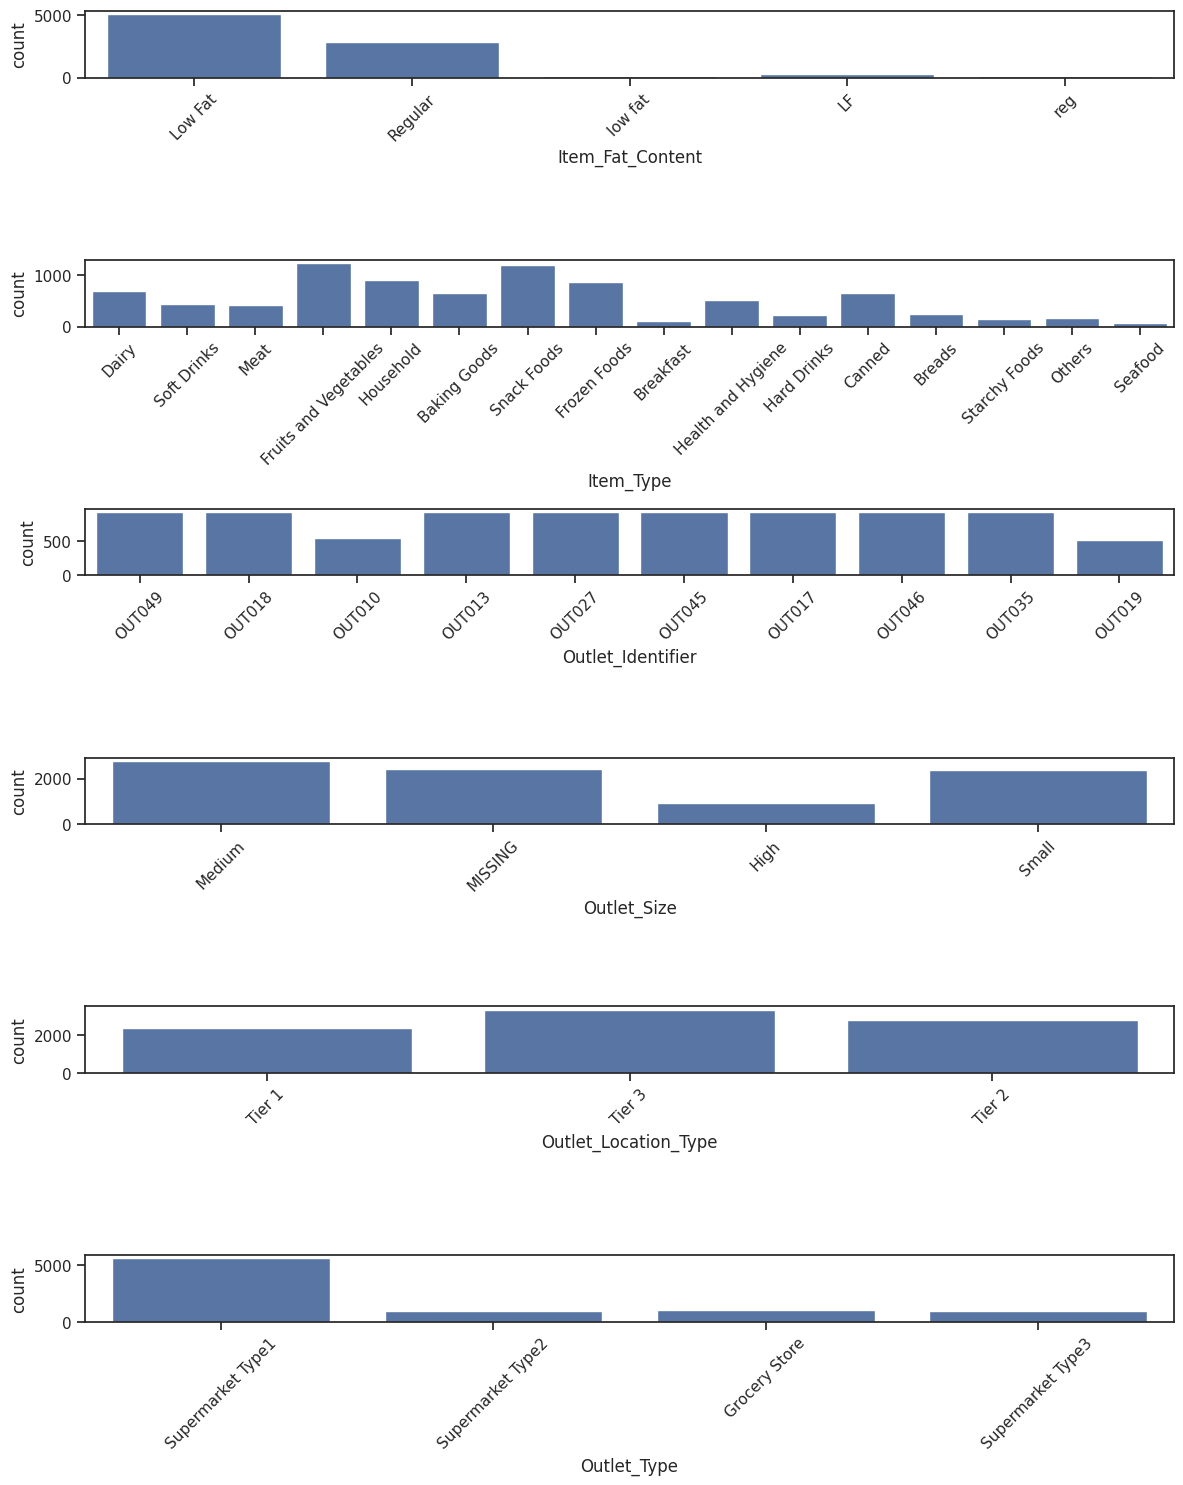

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
# Assuming you have your DataFrame `df1` already prepared
df2= df[cat_cols].drop(columns= ['Item_Identifier'])
cat_cols_len = len(df2.columns)
# Create subplots efficiently using `subplots_adjust`
fig, axes = plt.subplots(nrows=len(df2.columns), ncols=1, figsize=(12,15))  # Adjust figsize as needed

# Iterate through columns and create boxplots on respective axes
for i, col in enumerate(df2.columns):
    p3 = sns.countplot(data=df2, x=col, ax=axes[i])  # Use axes[i] for direct assignment
    p3.set_xticklabels(p3.get_xticklabels(), rotation=45);

plt.tight_layout();  # Adjust spacing between subplots

# Display the plot
plt.show();

#### EDA for numerical features

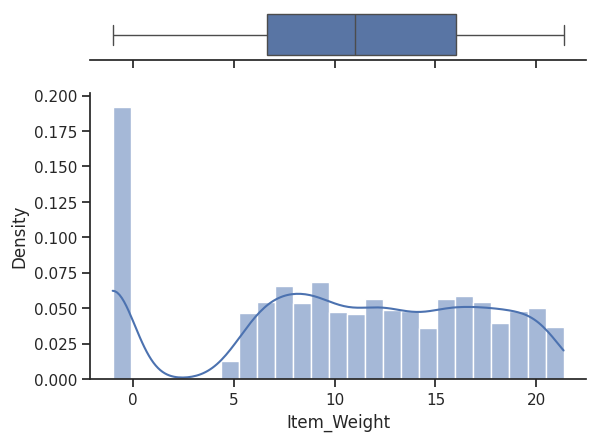

In [29]:
sns.set(style="ticks")


f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(x=df['Item_Weight'], ax=ax_box)
sns.histplot(x=df['Item_Weight'], bins='auto', kde=True, stat='density', ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

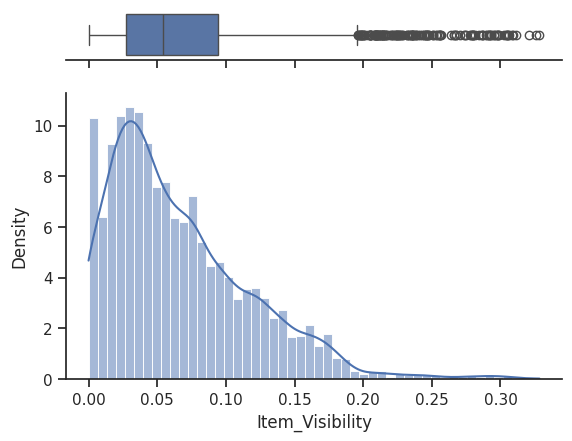

In [30]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(x=df['Item_Visibility'], ax=ax_box)
sns.histplot(x=df['Item_Visibility'], bins='auto', kde=True, stat='density', ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

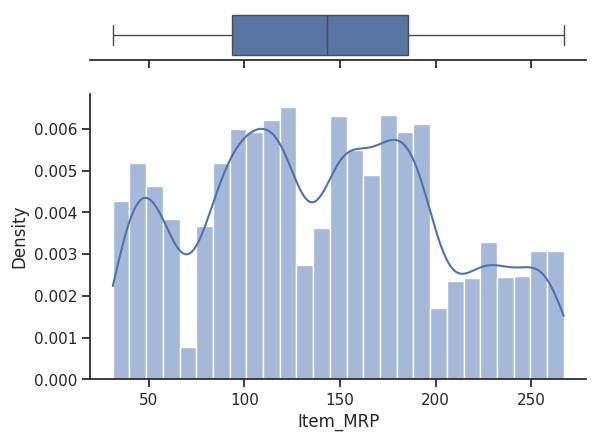

In [31]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(x=df['Item_MRP'], ax=ax_box)
sns.histplot(x=df['Item_MRP'], bins='auto', kde=True, stat='density', ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

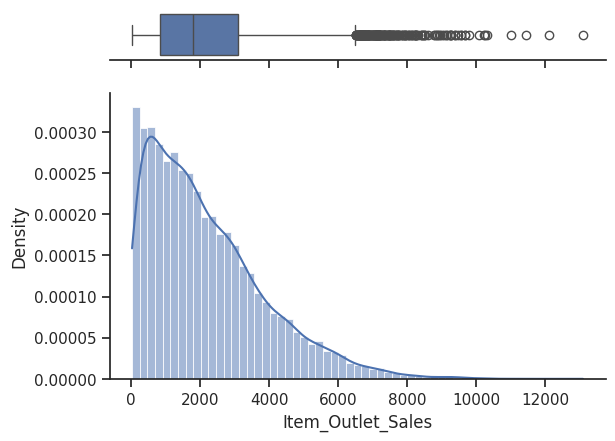

In [32]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(x=df['Item_Outlet_Sales'], ax=ax_box)
sns.histplot(x=df['Item_Outlet_Sales'], bins='auto', kde=True, stat='density', ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

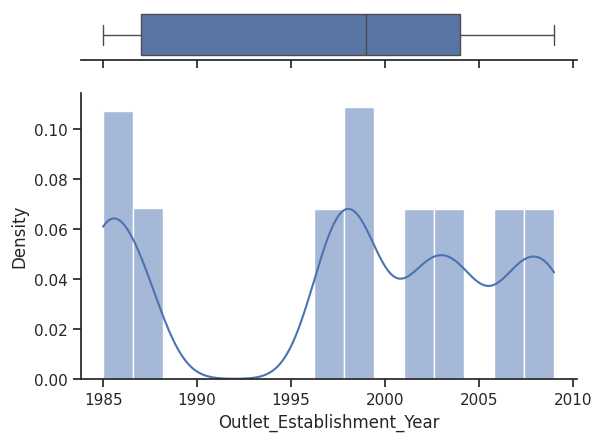

In [33]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(x=df['Outlet_Establishment_Year'], ax=ax_box)
sns.histplot(x=df['Outlet_Establishment_Year'], bins='auto', kde=True, stat='density', ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

### Multivariate Explanatory Data Analysis

In [34]:
# Get correlations
corr = df.corr(numeric_only = True)

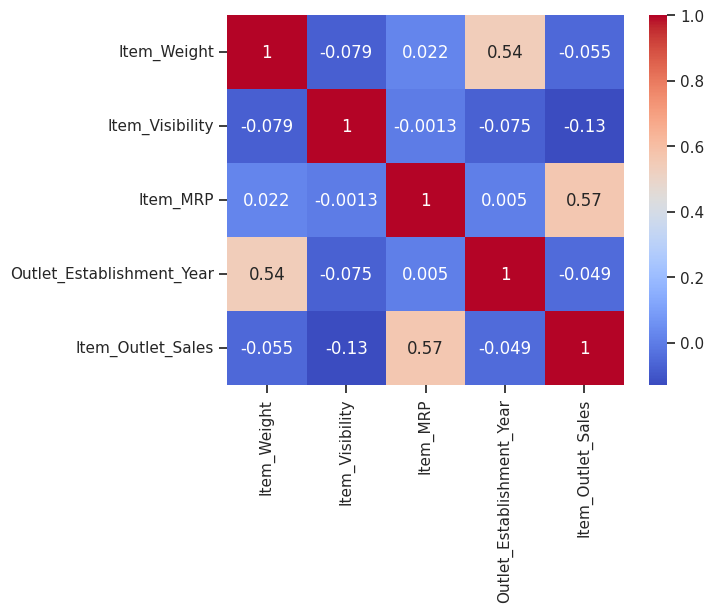

In [35]:
# Create a fig, ax with a figsize argument
sns.heatmap(corr, cmap = 'coolwarm', annot = True);

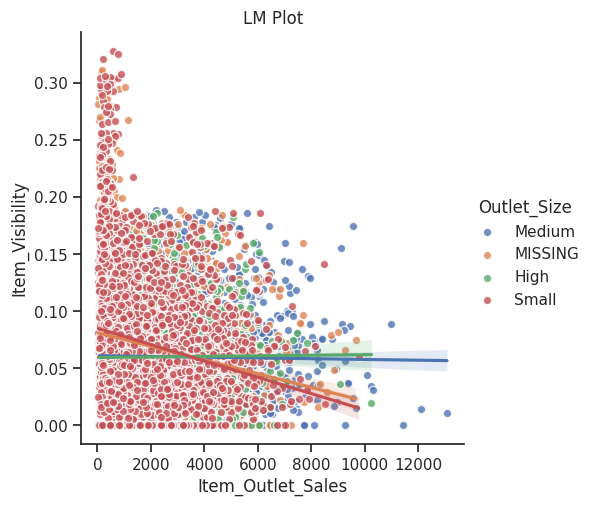

In [37]:
# Set the title using g.ax.set_title()
scatter_kws = dict(edgecolor='white')
g = sns.lmplot(data=df, x="Item_Outlet_Sales", y="Item_Visibility",
               scatter_kws=scatter_kws,
                hue="Outlet_Size");
g.ax.set_title("LM Plot");

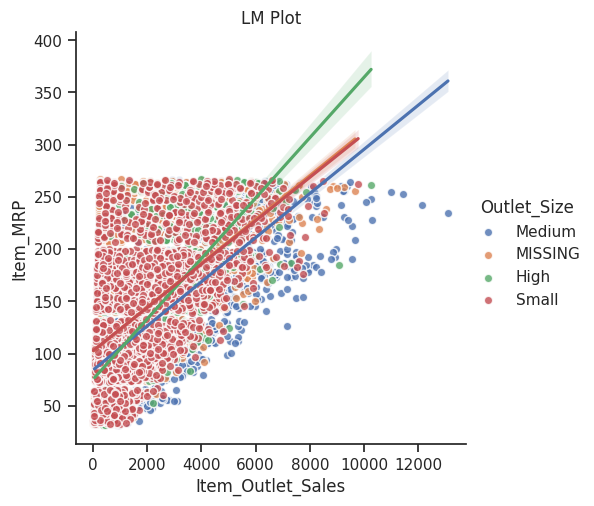

In [38]:
g = sns.lmplot(data=df, x="Item_Outlet_Sales", y="Item_MRP",
               scatter_kws=scatter_kws,
                hue="Outlet_Size");
g.ax.set_title("LM Plot");

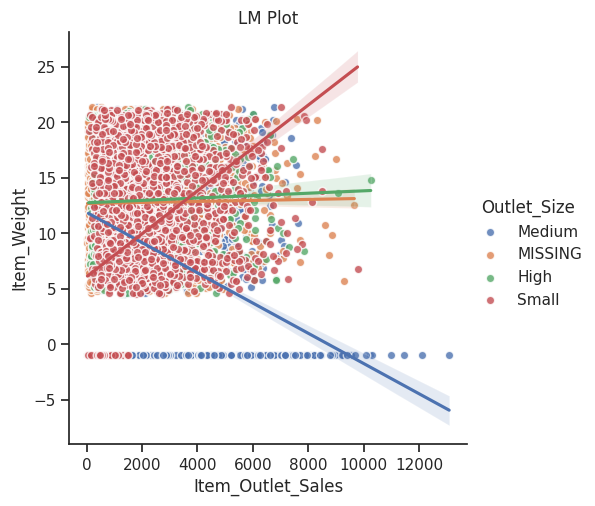

In [41]:
g = sns.lmplot(data=df, x="Item_Outlet_Sales", y="Item_Weight",
               scatter_kws=scatter_kws,
                hue="Outlet_Size");
g.ax.set_title("LM Plot");

## Feature Inspection